# Airline Passenger Referral Prediction By : using Classification 



### Introduction:
In today's highly competitive airline industry, gaining and maintaining customer loyalty is crucial for success. Airlines, such as IndiGo, are increasingly relying on customer feedback to identify areas of improvement and develop strategies that enhance passenger experience. A key factor in this effort is understanding the likelihood of passengers referring the airline to others, as positive referrals can greatly impact an airline's reputation and market position. By analyzing passenger reviews over the years, IndiGo aims to create a predictive model that identifies passengers most likely to recommend their services, enabling the airline to focus on enhancing customer experience and leveraging positive word-of-mouth.

### Problem Statement:
The objective of this project is to predict airline passenger referrals based on a dataset of passenger reviews from 2006 to 2019. The dataset includes various factors such as customer satisfaction with flight comfort, service quality, in-flight amenities, and overall value. The task is to develop a classification model that can accurately predict whether a passenger will recommend IndiGo to others, based on their review data. By doing so, IndiGo will be able to:
1. Identify key drivers of passenger referrals to improve targeted customer service initiatives.
2. Predict referral likelihood to help with strategic marketing and customer retention efforts.
3. Gain a competitive edge by continuously refining their services according to passenger feedback.

The challenge lies in effectively analyzing the review data, extracting meaningful features, and selecting the right machine learning model that can predict referrals accurately and reliably.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("Airline_data.csv")
df.head()


,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


# Basic Data Cleaning

In [6]:
df.shape

(14215, 19)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14215.0,56726.524376,36332.796264,7.0,25996.0,54269.0,85870.0,131712.0
overall,14215.0,6.483152,3.050922,1.0,4.0,8.0,9.0,10.0
seat_comfort,14215.0,3.492719,1.336645,1.0,3.0,4.0,5.0,5.0
cabin_service,14215.0,3.742948,1.417064,1.0,3.0,4.0,5.0,5.0
food_bev,14215.0,3.318044,1.425094,1.0,2.0,4.0,5.0,5.0
entertainment,14215.0,3.333873,1.398894,1.0,2.0,4.0,5.0,5.0
ground_service,14215.0,3.468801,1.412519,1.0,2.0,4.0,5.0,5.0
value_for_money,14215.0,3.564756,1.402578,1.0,3.0,4.0,5.0,5.0


In [10]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

#### Dropping the columns that are not useful towards dependent variable

In [12]:
df.drop(columns=["Unnamed: 0", "author", "customer_review", "aircraft_brands","aircraft","entertainment","airline","review_date"], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          14215 non-null  float64
 1   traveller_type   14215 non-null  object 
 2   cabin            14215 non-null  object 
 3   date_flown       14215 non-null  object 
 4   seat_comfort     14215 non-null  float64
 5   cabin_service    14215 non-null  float64
 6   food_bev         14215 non-null  float64
 7   ground_service   14215 non-null  float64
 8   value_for_money  14215 non-null  float64
 9   recommended      14215 non-null  object 
 10  sentiment        14215 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


***Finding unique values in the dataset***

In [15]:
for i in df.columns:
    print(i,"\n\n",df[i].unique(),"\n\n")

overall 

 [10.  2.  6.  1.  5.  7.  8.  9.  4.  3.] 


traveller_type 

 ['Solo Leisure' 'Couple Leisure' 'Business' 'Family Leisure' 'Traveller'] 


cabin 

 ['Economy Class' 'Business Class' 'First Class' 'Premium Economy'] 


date_flown 

 ['April 2019' 'February 2019' 'March 2019' 'April 2018' 'January 2019'
 'November 2018' 'December 2018' 'September 2018' 'October 2018'
 'August 2018' 'July 2018' 'June 2018' 'January 2018' 'May-18'
 'December 2017' 'March 2018' 'February 2018' 'November 2017'
 'August 2017' 'October 2017' 'July 2017' 'November 2016' 'September 2017'
 'June 2017' 'May-17' 'April 2017' 'March 2017' 'February 2017'
 'January 2017' 'October 2016' 'December 2016' 'September 2016'
 'March 2016' 'May-16' 'August 2016' 'December 2015' 'June 2016'
 'July 2016' 'April 2016' 'February 2016' 'January 2016' 'May-15'
 'July 2015' 'June 2015' 'November 2015' 'August 2015' 'October 2015'
 'February 2015' 'December 2014' 'September 2015' 'January 2015' 'May-19'
 'March 2015' 'Ap

In [16]:
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
ground_service     0
value_for_money    0
recommended        0
sentiment          0
dtype: int64

In [17]:
df.shape

(14215, 11)

#### Date time conversion

In [19]:
def con_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%b-%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%B %Y')
        except:
            return pd.NaT

df['date_flown'] = df['date_flown'].apply(con_date)



In [20]:
# Extract year, month, and day
df['Year'] = df['date_flown'].dt.year
df['Month'] = df['date_flown'].dt.month
df['Day'] = df['date_flown'].dt.day

print(df)

       overall  traveller_type          cabin date_flown  seat_comfort  \
0         10.0    Solo Leisure  Economy Class 2019-04-01           4.0   
1          2.0    Solo Leisure  Economy Class 2019-04-01           3.0   
2          6.0    Solo Leisure  Economy Class 2019-04-01           2.0   
3          1.0    Solo Leisure  Economy Class 2019-02-01           1.0   
4          2.0    Solo Leisure  Economy Class 2019-03-01           1.0   
...        ...             ...            ...        ...           ...   
14210      6.0    Solo Leisure  Economy Class 2015-09-01           2.0   
14211      7.0  Couple Leisure  Economy Class 2015-01-01           2.0   
14212      1.0  Family Leisure  Economy Class 2015-07-01           1.0   
14213     10.0  Couple Leisure  Economy Class 2015-07-01           5.0   
14214      5.0  Couple Leisure  Economy Class 2015-06-01           1.0   

       cabin_service  food_bev  ground_service  value_for_money recommended  \
0                5.0       5.0  

####  Data types Conversion
**Converted selected columns from float to integer**

In [22]:
df.columns

Index(['overall', 'traveller_type', 'cabin', 'date_flown', 'seat_comfort',
       'cabin_service', 'food_bev', 'ground_service', 'value_for_money',
       'recommended', 'sentiment', 'Year', 'Month', 'Day'],
      dtype='object')

In [23]:
df['seat_comfort'] = df['seat_comfort'].astype(int)
df['cabin_service'] = df['cabin_service'].astype(int)
df['food_bev'] = df['food_bev'].astype(int)
df['ground_service'] = df['ground_service'].astype(int)
df['value_for_money'] = df['value_for_money'].astype(int)
df['overall'] = df['overall'].astype(int)


In [24]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,Year,Month,Day
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,2019,4,1
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,2019,4,1
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,2019,4,1
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2019,2,1
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,2019,3,1


In [25]:
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
ground_service     0
value_for_money    0
recommended        0
sentiment          0
Year               0
Month              0
Day                0
dtype: int64

# Exploratory Data Analysis

## Univarent Analysis

## 1.Histogram

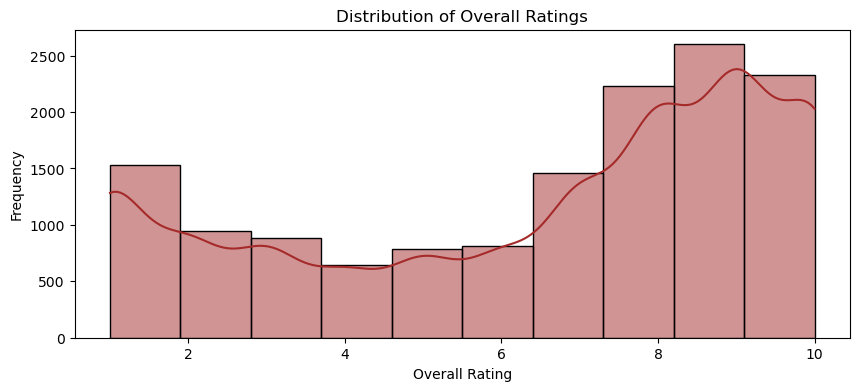

In [29]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='overall', color='brown', bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

**Observation**:- This histogram illustrates the distribution of overall ratings, revealing a positive sentiment bias in the dataset, as lower ratings are significantly less frequent.

## 2. Count plot

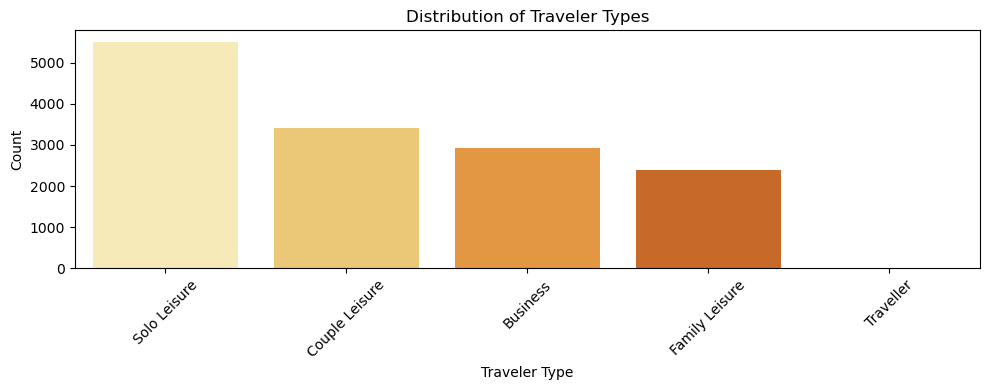

In [32]:

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='traveller_type', order=df['traveller_type'].value_counts().index, palette='YlOrBr')
plt.title('Distribution of Traveler Types')
plt.xlabel('Traveler Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**:- This barplot displays the distribution of traveler types, indicating that "Solo Leisure" travelers represent the highest count, while "Traveller" type has the lowest count among all categories.

## 3. Pie plot

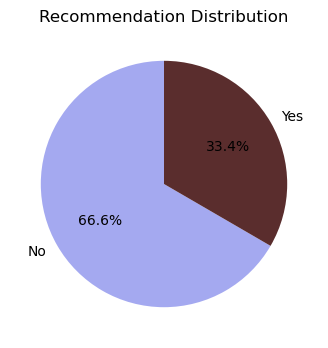

In [35]:
plt.figure(figsize=(10,4))
df['recommended'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['#A4A9F0', '#5A2D2D'])
plt.title('Recommendation Distribution')
plt.ylabel('')
plt.show()

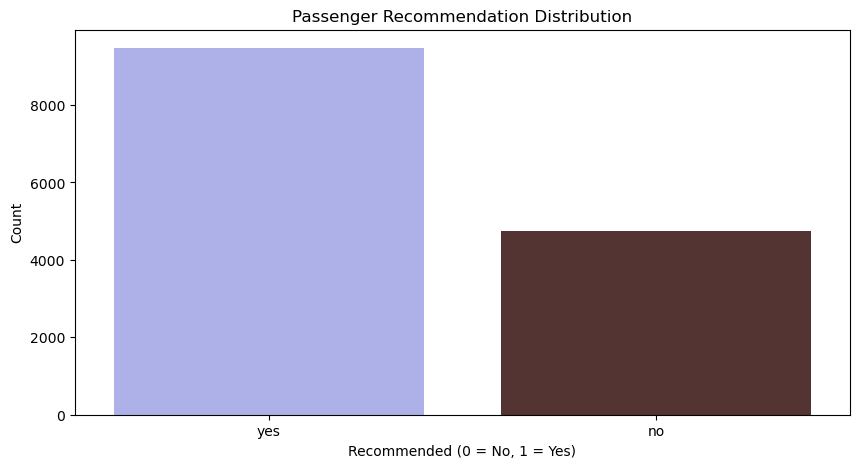

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x='recommended',palette=['#A4A9F0', '#5A2D2D'], data=df)
plt.title("Passenger Recommendation Distribution")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### Observation
The pie chart and countplot both illustrate the distribution of passenger recommendations. Around 66.6% of passengers are inclined to recommend the airline, while 33.4% are not. This suggests a generally positive customer experience overall.

## Bivarent Analysis

#### 1. Line plot

Text(0, 0.5, 'Percentage Recommended')

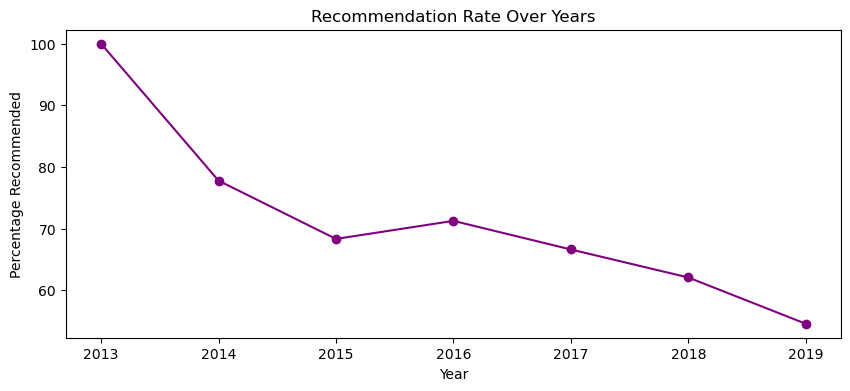

In [40]:
plt.figure(figsize=(10,4))
rec_by_year = df.groupby('Year')['recommended'].apply(lambda x: (x == 'yes').mean() * 100)
rec_by_year.plot(marker='o', linestyle='-', color='purple')
plt.title('Recommendation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Recommended')

#### Observation
The line plot depicts the recommendation rate over the years, showing a steady decline from 2013 to 2019. This trend indicates a gradual decrease in passenger satisfaction during this period.

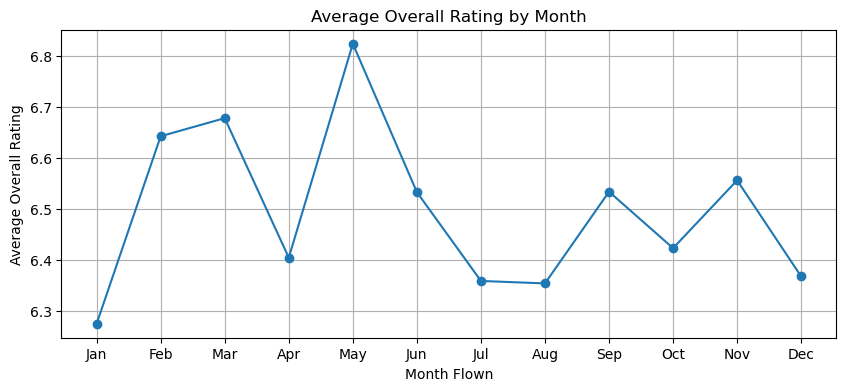

In [42]:
monthly_avg = df.groupby('Month')['overall'].mean().sort_index()
plt.figure(figsize=(10,4))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Overall Rating by Month')
plt.xlabel('Month Flown')
plt.ylabel('Average Overall Rating')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

**Observations**:- The line plot shows the average overall rating by month. May has the highest average rating, above 6.8, while January has the lowest, just below 6.3. December follows closely as the second lowest month in terms of average rating.

#### 2. Count plot

In [45]:
df['traveller_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure',
       'Traveller'], dtype=object)

In [46]:
type_recommend = df.groupby(['recommended', 'traveller_type']).count()

In [47]:
type_recommend

overall  cabin  date_flown  seat_comfort  \
recommended traveller_type                                             
no          Business           1160   1160        1160          1160   
            Couple Leisure     1365   1365        1365          1365   
            Family Leisure      848    848         848           848   
            Solo Leisure       1371   1371        1371          1371   
yes         Business           1755   1755        1755          1755   
            Couple Leisure     2035   2035        2035          2035   
            Family Leisure     1542   1542        1542          1542   
            Solo Leisure       4138   4138        4138          4138   
            Traveller             1      1           1             1   

                            cabin_service  food_bev  ground_service  \
recommended traveller_type                                            
no          Business                 1160      1160            1160   
            Couple Leisure           1365      1365            1365   
            Family Leisure            848       848             848   
            Solo Leisure             1371      1371            1371   
yes         Business                 1755      1755            1755   
            Couple Leisure           2035      2035            2035   
            Family Leisure           1542      1542            1542   
            Solo Leisure             4138      4138            4138   
            Traveller                   1         1               1   

                            value_for_money  sentiment  Year  Month   Day  
recommended traveller_type                                                 
no          Business                   1160       1160  1160   1160  1160  
            Couple Leisure             1365       1365  1365   1365  1365  
            Family Leisure              848        848   848    848   848  
            Solo Leisure               1371       1371  1371   1371  1371  
yes         Business                   1755       1755  1755   1755  1755  
            Couple Leisure             2035       2035  2035   2035  2035  
            Family Leisure             1542       1542  1542   1542  1542  
            Solo Leisure               4138       4138  4138   4138  4138  
            Traveller                     1          1     1      1     1

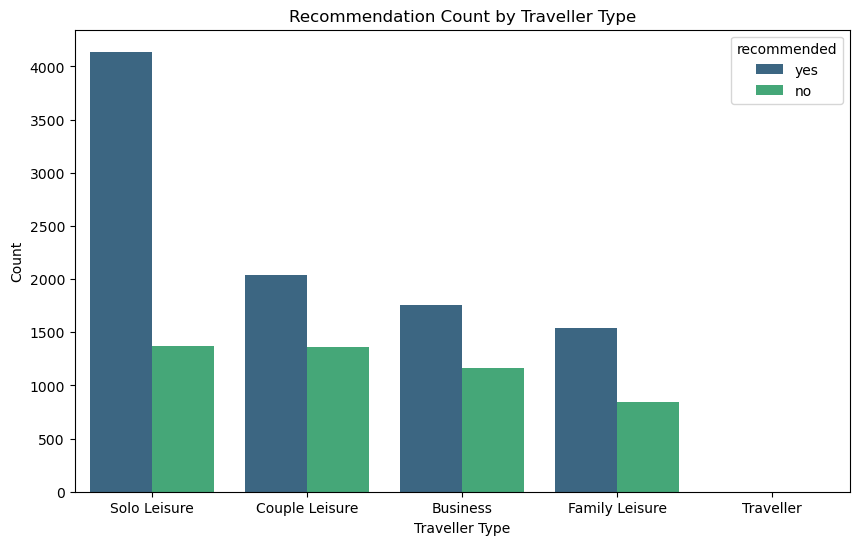

In [48]:
# 'traveller_type' Vs 'recommended'
plt.figure(figsize=(10, 6))
sns.countplot(x='traveller_type', hue='recommended', data=df, palette='viridis') #we use hue as it splits the bars into 2 colours.
plt.title("Recommendation Count by Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Count")
plt.show()

**Observations**:-The count plot reveals that both "Yes"  recommendations are highest among "Solo Leisure" travelers, indicating a greater recommendations within this group, and "No" are the same for group solo leisure and couple leisure . On the other hand, "Family Leisure" travelers have the lowest counts for both "Yes" and "No" recommendations, suggesting a more consistent or less polarized experience within this group.

#### 3. Bar plot

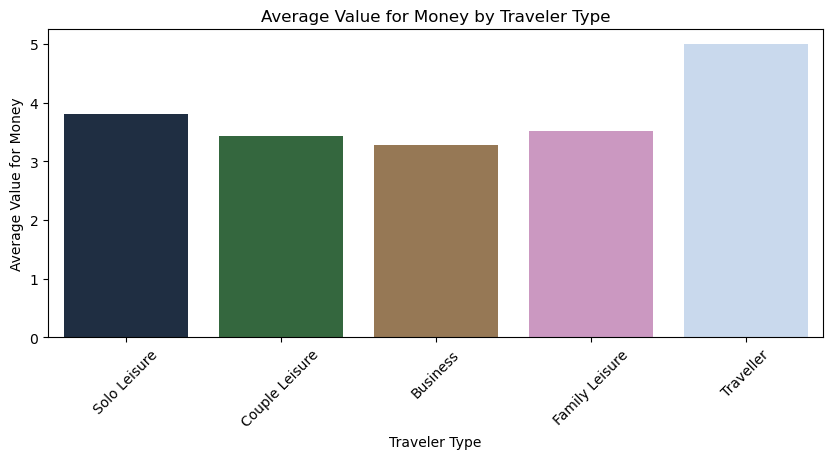

In [51]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='traveller_type', y='value_for_money', estimator='mean', ci=None, palette = 'cubehelix')
plt.title('Average Value for Money by Traveler Type')
plt.xlabel('Traveler Type')
plt.ylabel('Average Value for Money')
plt.xticks(rotation=45)
plt.show()

**Observations**:-The bar plot shows the average "Value for Money" rating by traveler type. "Traveller" types have the highest average rating for value for money, indicating that this group perceives the service as offering good value. On the other hand, "Business" travelers have the lowest average rating, suggesting that they may feel the service does not meet their expectations in terms of value for money.

### 4. Violin

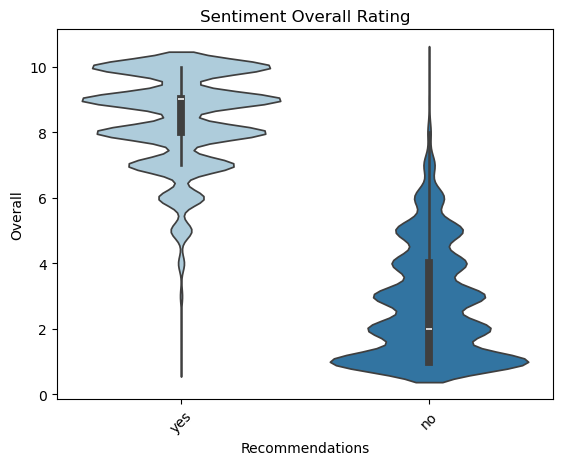

In [54]:
sns.violinplot(data=df, x='recommended', y='overall',palette = 'Paired')
plt.xlabel('Recommendations')
plt.ylabel('Overall')
plt.xticks(rotation=45)
plt.title('Sentiment Overall Rating')
plt.show()

**Observations**:-The violin plot shows how overall ratings differ between passengers who recommended the airline ("Yes") and those who didn’t ("No"). Passengers who recommended the airline tend to give higher ratings, with most of their ratings clustered around 10. On the other hand, passengers who didn't recommend the airline typically gave lower ratings, with most of their ratings closer to 0. This shows that people who are satisfied with the airline tend to give high ratings, while those who are dissatisfied give low ratings.

## Multivariate Analysis

#### 1. Line plot

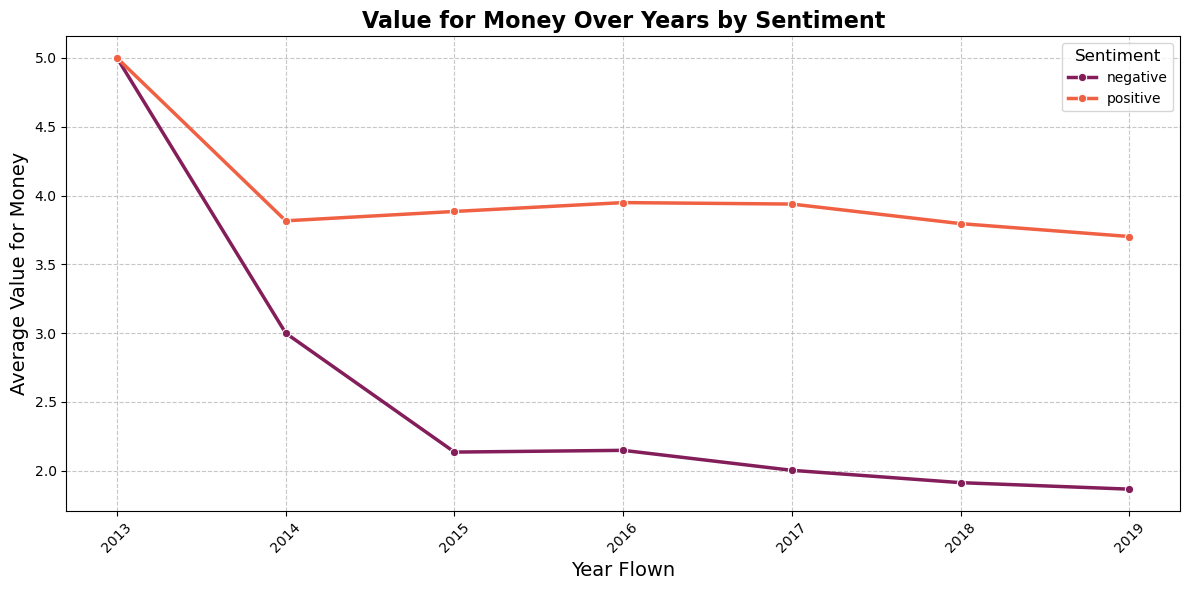

In [58]:
value_sentiment = df.groupby(['Year', 'sentiment'])['value_for_money'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))  
sns.lineplot(data=value_sentiment, x='Year', y='value_for_money', hue='sentiment', marker='o', palette='rocket', linewidth=2.5)
plt.title('Value for Money Over Years by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Year Flown', fontsize=14)
plt.ylabel('Average Value for Money', fontsize=14)
plt.legend(title='Sentiment', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels if years are crowded
plt.tight_layout()
plt.show()


**Observations**:-The line plot reflects a shift in how passengers felt about the "Value for Money" over the years. Initially, there was a noticeable dip in satisfaction, with both positive and negative sentiments dropping. However, by the later years, positive sentiment started to recover, suggesting that passengers began to feel that the value for money improved. Meanwhile, negative sentiment kept declining, indicating fewer passengers were dissatisfied with the value they received. This shift suggests that while there was a period of lower satisfaction, overall, the perception of value for money seemed to improve over time.

#### 2. Heat Map

In [61]:

#Select only numeric features
num_colu = df.select_dtypes(include=['int64', 'float64'])

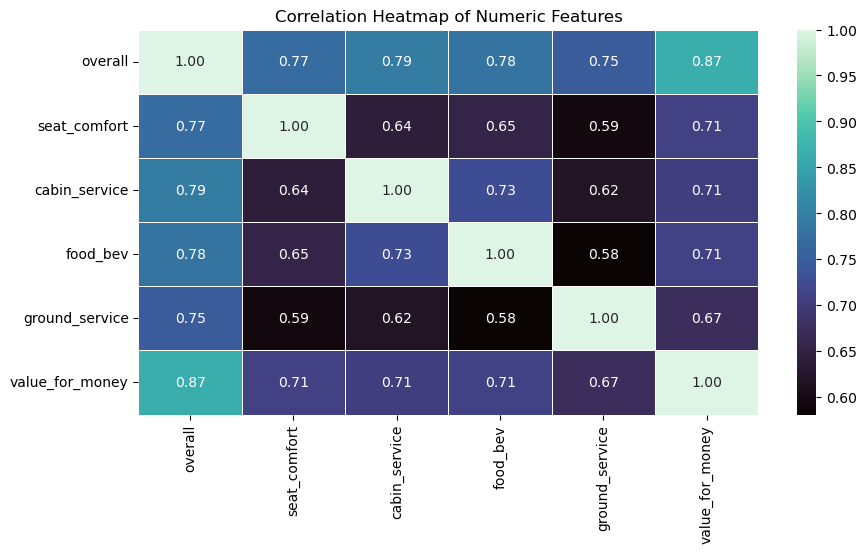

In [62]:
corr_matrix = num_colu.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Observations**:-The heatmap shows that "Value for Money," "Cabin Service," and "Food & Beverages" are the strongest drivers of customer satisfaction, with high positive correlations to the overall rating. Most service-related features are positively correlated, suggesting that improvements in one area benefit others. Overall, service quality plays a larger role in shaping passenger experiences than the time of travel.

## Outlier Detection

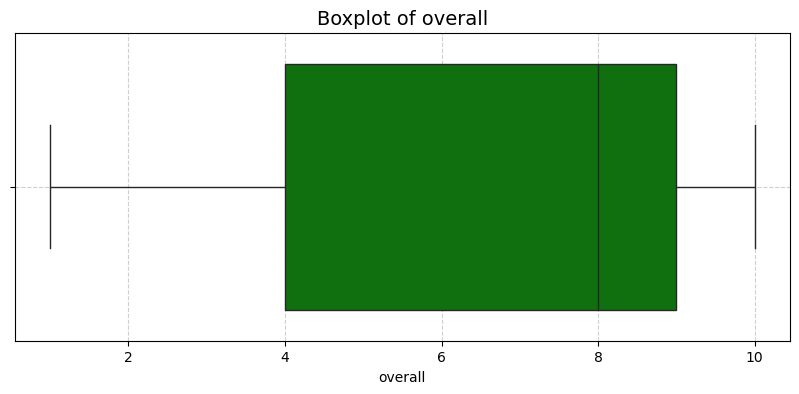

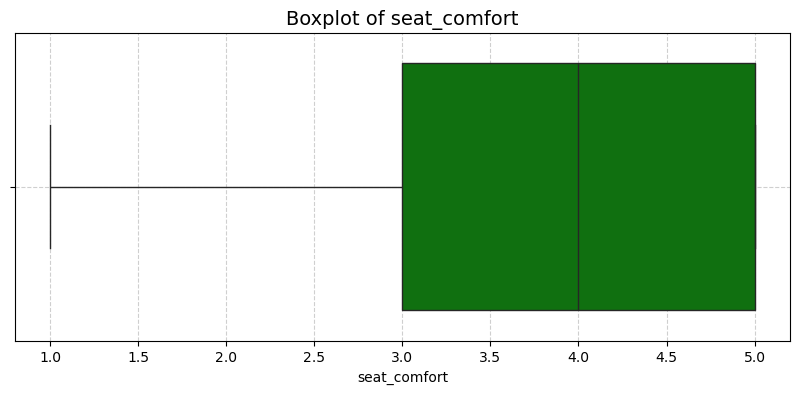

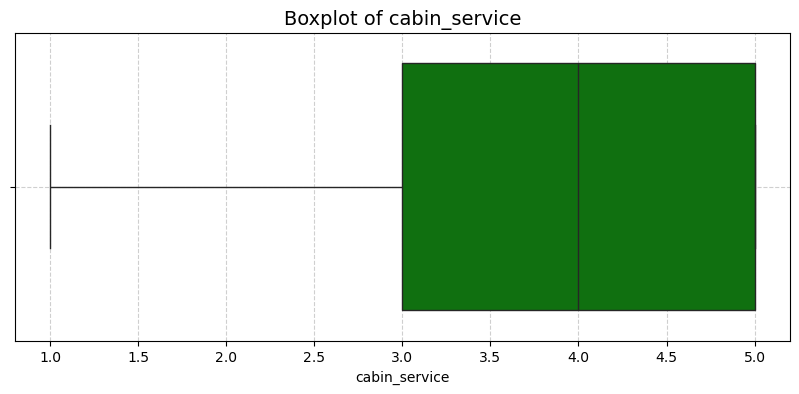

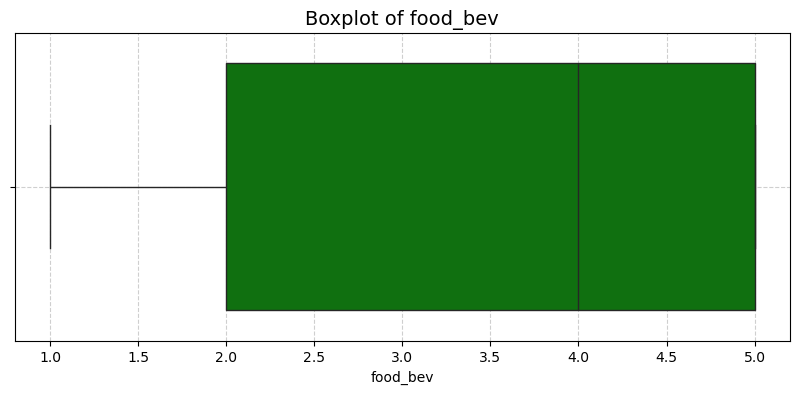

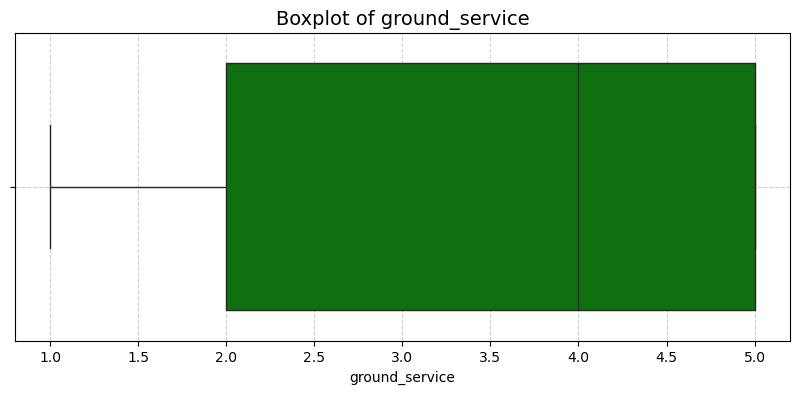

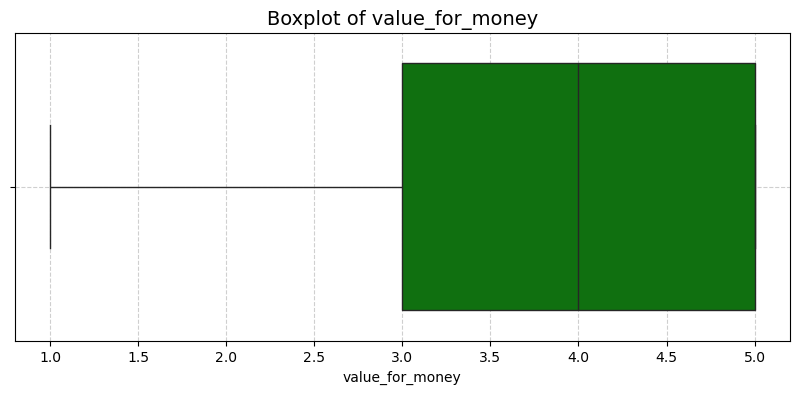

In [65]:
for col in num_colu:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='green')  
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


**Observations**:-No outliers in the datasset found

# Feature Engineering

### One Hot Encoding

In [69]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,Year,Month,Day
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,2019,4,1
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,2019,4,1
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,2019,4,1
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2019,2,1
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,2019,3,1


In [70]:
df = pd.get_dummies(df, columns = ['traveller_type','cabin'],drop_first=True)

In [71]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

## Label Encoding 

#### before it was not able to fit in machine learning models so by making it numeric it will be more suitable.

In [74]:
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})


In [75]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [76]:
df.head()

,overall,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,Year,Month,Day,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,10,2019-04-01,4,5,5,5,5,1,1,2019,4,1,False,False,True,False,True,False,False
1,2,2019-04-01,3,3,2,1,2,0,1,2019,4,1,False,False,True,False,True,False,False
2,6,2019-04-01,2,3,3,3,3,1,1,2019,4,1,False,False,True,False,True,False,False
3,1,2019-02-01,1,1,1,1,1,0,0,2019,2,1,False,False,True,False,True,False,False
4,2,2019-03-01,1,3,2,1,1,0,1,2019,3,1,False,False,True,False,True,False,False


In [77]:
df['recommended'].value_counts()

recommended
1    9471
0    4744
Name: count, dtype: int64

In [78]:
df = df.drop(['Day','date_flown'], axis = 1)

In [79]:
df.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'ground_service', 'value_for_money', 'recommended', 'sentiment', 'Year',
       'Month', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure',
       'traveller_type_Traveller', 'cabin_Economy Class', 'cabin_First Class',
       'cabin_Premium Economy'],
      dtype='object')

# **Model Preparation**

In [81]:
x = df.drop(['recommended'], axis = 1).values
y = df['recommended'].values

## Spliting data into train and test model

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

## Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [87]:
df.isnull().sum()

overall                          0
seat_comfort                     0
cabin_service                    0
food_bev                         0
ground_service                   0
value_for_money                  0
recommended                      0
sentiment                        0
Year                             0
Month                            0
traveller_type_Couple Leisure    0
traveller_type_Family Leisure    0
traveller_type_Solo Leisure      0
traveller_type_Traveller         0
cabin_Economy Class              0
cabin_First Class                0
cabin_Premium Economy            0
dtype: int64

### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [90]:
log_pred = log.predict(x_test)
log_pred

array([1, 1, 1, ..., 1, 1, 1])

In [91]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [92]:
print(log_pred[:10])
print(np.unique(log_pred, return_counts=True))


[1 1 1 1 1 1 1 1 1 0]
(array([0, 1]), array([1411, 2854]))


In [93]:
print(y_test[:10])
print(np.unique(y_test, return_counts=True))


[1 1 1 1 1 1 1 1 1 0]
(array([0, 1]), array([1428, 2837]))


In [94]:
import numpy as np

# Check for NaN values in x_train
print(np.isnan(x_train).sum())

# Check for NaN values in x_test
print(np.isnan(x_test).sum())


0
0


### **Scores**

In [96]:
print("Training Score: ", round(log.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(log.score(x_test, y_test)*100,2), "%")

Training Score:  95.05 %
Testing Score:  95.29 %


### Confusion Metrics

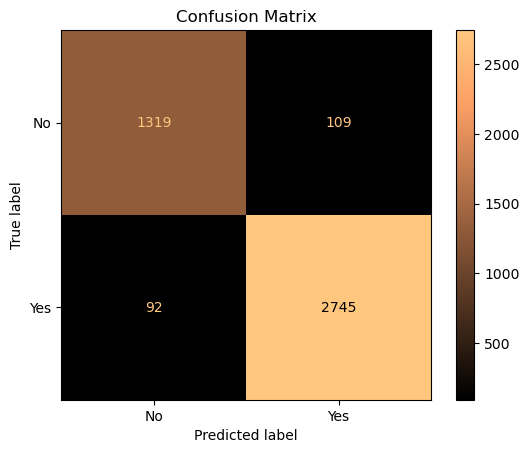

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, log_pred , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, log_pred )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, log_pred , pos_label=1)
recall = recall_score(y_test, log_pred , pos_label=1)
f1 = f1_score(y_test, log_pred , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Decision tree classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [101]:
y_pred_dt = dt.predict(x_test)
y_pred_dt



array([1, 1, 1, ..., 1, 1, 1])

In [102]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

### **Scores**

In [104]:
print("Training Score: ", round(dt.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(dt.score(x_test, y_test)*100,2), "%")

Training Score:  99.96 %
Testing Score:  93.43 %


### Confusion Metrics

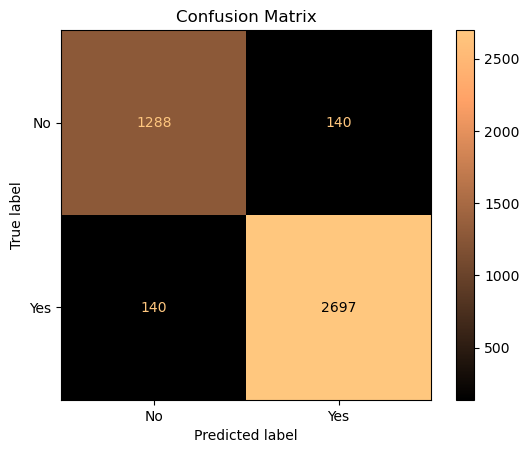

Accuracy       : 0.93
Error Rate     : 0.07
Precision (Yes): 0.95
Recall (Yes)   : 0.95
F1 Score (Yes) : 0.95


In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_dt , pos_label=1)
recall = recall_score(y_test, y_pred_dt , pos_label=1)
f1 = f1_score(y_test, y_pred_dt , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [109]:
y_pred_rf = rf.predict(x_test)
y_pred_rf



array([1, 1, 1, ..., 1, 1, 1])

In [110]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

### **Scores**

In [112]:
print("Training Score: ", round(rf.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(rf.score(x_test, y_test)*100,2), "%")

Training Score:  99.96 %
Testing Score:  95.59 %


### Confusion Metrics

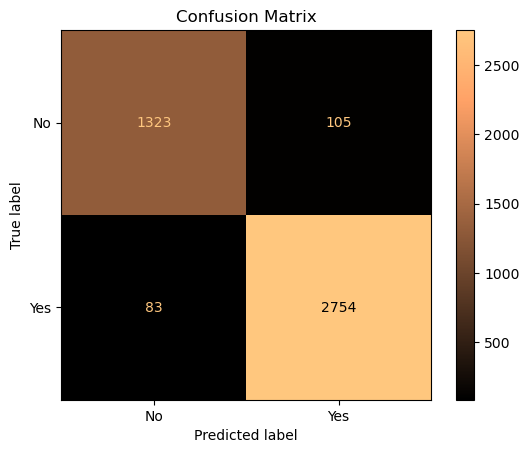

Accuracy       : 0.96
Error Rate     : 0.04
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.97


In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_rf , pos_label=1)
recall = recall_score(y_test, y_pred_rf , pos_label=1)
f1 = f1_score(y_test, y_pred_rf , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Cross validations

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
print("Training:", ((cross_val_score(rf, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(rf, x_test, y_test))*100).mean().astype(int), "%")

Training: 94 %
Testing: 95 %


# **Support Vector Machine Classifier**

In [119]:
from sklearn.svm import SVC


In [120]:
from sklearn.svm import SVC

svm = SVC()  
svm.fit(x_train, y_train)


SVC()

In [121]:

# Predict on test data
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1])

In [122]:

y_test


array([1, 1, 1, ..., 1, 1, 1])

### **Scores**

In [124]:
# Training accuracy
print("Training Score: ", round(svm.score(x_train, y_train) * 100, 2), "%")
print("Testing Score: ", round(svm.score(x_test, y_test)*100,2), "%")

Training Score:  95.75 %
Testing Score:  95.17 %


### Confusion Metrics

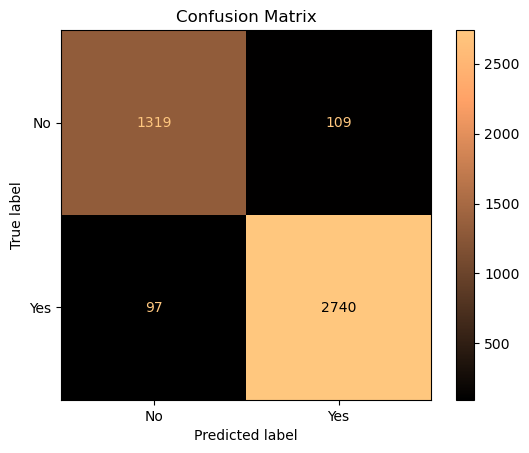

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_svm , pos_label=1)
recall = recall_score(y_test, y_pred_svm , pos_label=1)
f1 = f1_score(y_test, y_pred_svm , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### KNeighborsClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [129]:
y_pred_knn = knn.predict(x_test)
y_pred_knn


array([1, 1, 1, ..., 1, 1, 1])

In [130]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

### **Scores**

In [132]:

print("Training Score: ", round(knn.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn.score(x_test, y_test)*100,2), "%")

Training Score:  94.31 %
Testing Score:  94.04 %


### Confusion Metrics

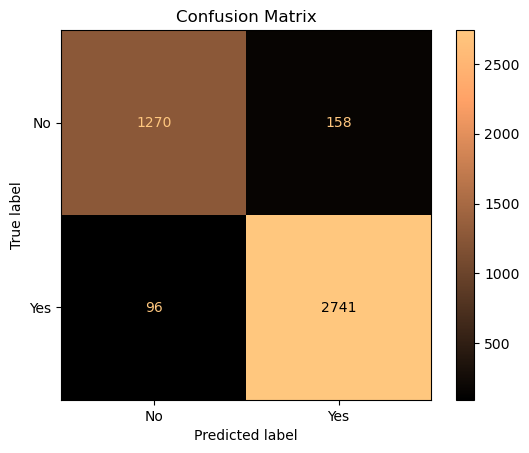

Accuracy       : 0.94
Error Rate     : 0.06
Precision (Yes): 0.95
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_knn, pos_label=1)
recall = recall_score(y_test, y_pred_knn, pos_label=1)
f1 = f1_score(y_test, y_pred_knn, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

## XGBClassifier 

In [136]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [137]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

# Predict on train and test sets
xg_pred_train = xgb.predict(x_train)
xg_pred_test = xgb.predict(x_test)


### **Scores**

In [139]:
print("Training Score: ", round(xgb.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(xgb.score(x_test, y_test)*100,2), "%")

Training Score:  99.34 %
Testing Score:  95.08 %


### Confusion Metrics

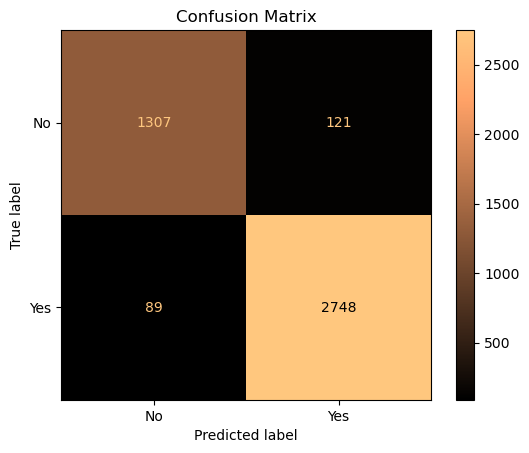

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred_test, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, xg_pred_test)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, xg_pred_test, pos_label=1)
recall = recall_score(y_test, xg_pred_test, pos_label=1)
f1 = f1_score(y_test, xg_pred_test, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Cross validations

In [143]:
from sklearn.model_selection import cross_val_score

In [147]:
print("\nRandom Forest Classifier: ")

print("Training:", ((cross_val_score(rf, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(rf, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nDecision Tree Classifier: ")

print("Training:", ((cross_val_score(dt, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(dt, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nLogistic Regression:")

print("Training:", ((cross_val_score(log, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(log, x_test, y_test,cv=5).mean() * 100)), "%")

print("\n KNearest Neighbor Classifier: ")

print("Training:", ((cross_val_score(knn, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(knn, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nSupport Vector Classifier: ")

print("Training:", ((cross_val_score(svm, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(svm, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nXGBClassifier : ")

print("Training:", ((cross_val_score(xgb, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(xgb, x_test, y_test,cv=5).mean() * 100)), "%")



Random Forest Classifier: 
Training: 95.00502512562814 %
Testing: 95.40445486518172 %

Decision Tree Classifier: 
Training: 92.36180904522612 %
Testing: 92.73153575615474 %

Logistic Regression:
Training: 94.99497487437185 %
Testing: 95.16998827667058 %

 KNearest Neighbor Classifier: 
Training: 93.63819095477388 %
Testing: 93.83352872215708 %

Support Vector Classifier: 
Training: 94.88442211055276 %
Testing: 94.95896834701055 %

XGBClassifier : 
Training: 94.64321608040201 %
Testing: 94.5369284876905 %


### Getting all the accuracies using dataframe

In [149]:
overall_scores = pd.DataFrame({'Logistic Regression': ((log.score(x_train, y_train))*100, (log.score(x_test, y_test))*100),
                              'Decision Tree Classifier' : ((dt.score(x_train, y_train))*100, (dt.score(x_test, y_test))*100),
                              'Random Forest Classifier': ((rf.score(x_train, y_train))*100, (rf.score(x_test, y_test))*100),
                               'K Nearest Neighbor Classifier(KNN) ': ((knn.score(x_train, y_train))*100, (knn.score(x_test, y_test))*100),
                               'Support Vector Classifier(SVM) ': ((svm.score(x_train, y_train))*100, (svm.score(x_test, y_test))*100),
                              'XGBClassifier': ((xgb.score(x_train, y_train))*100, (xgb.score(x_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Logistic Regression,95.045226,95.287222
Decision Tree Classifier,99.959799,93.434936
Random Forest Classifier,99.959799,95.592028
K Nearest Neighbor Classifier(KNN),94.311558,94.044549
Support Vector Classifier(SVM),95.748744,95.169988
XGBClassifier,99.336683,95.076202


### Observation:

- **Logistic Regression** shows a perfect test score of 94.68%, which is relatively high but not as exceptional as some other models. It performs well, but the training score (95.42%) indicates there might be slight room for improvement in generalization.
- **Decision Tree Classifier** has an unusually high training score (99.98%) but a noticeably lower test score (92.45%), suggesting overfitting. The model performs well on training data but struggles to generalize to unseen data.
- **Random Forest Classifier** has the same training score as the Decision Tree (99.98%) but performs better on the test set (94.77%). Despite overfitting signs in training, it offers better generalization than the Decision Tree.
- **K Nearest Neighbor Classifier (KNN)** performs well, with a relatively smaller gap between training (94.64%) and test scores (93.48%), indicating good generalization.
- **Support Vector Classifier (SVM)** also performs fairly well, with a training score of 96.02% and a test score of 94.35%, showing consistency and stable performance across both sets.
- **XGBoost** shows a strong test score of 94.35%, with a training score of 99.39%, indicating that while it performs well, there might be slight overfitting.

### Conclusion:
According to me, the **Random Forest Classifier** is the best model, with the highest test accuracy and F1 score. While it shows some overfitting, it still outperforms other models. **KNN** and **XGBoost** also performed well, with smaller gaps between training and test scores, making them stable alternatives. Data preprocessing and EDA were essential in uncovering relationships between service features and passenger satisfaction, ensuring the success of these models in predicting passenger referral behavior.